In [108]:
import numpy as np
import pandas as pd 
import os

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image


In [110]:
x = pd.read_csv('fer2013.csv')
print (x.values.shape)

(35887, 3)


In [111]:
data = x.values
print (data.shape)
print (data[0, 0])

(35887, 3)
0


In [112]:
y = data[:, 0]
pixels = data[:, 1]
print (type(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
8287
3


In [113]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [114]:
import numpy as np
from matplotlib import pyplot as plt
import os
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils

In [115]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [116]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [117]:
x = X

In [118]:
x = x / 255

In [119]:
X_train = x[0:28710, :]
Y_train = y[0:28710]
print (X_train.shape, Y_train.shape)
X_crossval = x[28710:32300, :]
Y_crossval = y[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [120]:
X_train = X_train.reshape((X_train.shape[0], 48, 48, 1 ))
X_crossval = X_crossval.reshape((X_crossval.shape[0],48, 48, 1))

In [121]:
X_train.shape

(28710, 48, 48, 1)

In [122]:
print (y.shape)
y_ = np_utils.to_categorical(y, 7)
print (y_.shape)

(35887,)
(35887, 7)


In [123]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(3590, 48, 48, 1) (3590, 7)


In [124]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [125]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [126]:
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [127]:
def my_model():
    input_shape = (48,48,1)
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48,48,1)))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(96, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(7 , activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])
    return model

model=my_model()
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 48, 24, 16)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 48, 24, 64)        9280      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 48, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 48, 12, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 48, 12, 96)       

c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  import sys
c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.
c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  del sys.path[0]
c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format

In [128]:
batch_size = 128
epochs = 14
model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [129]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 2)



Epoch 1/14
 - 24s - loss: 0.4151 - accuracy: 0.8507 - val_loss: 0.3847 - val_accuracy: 0.8571
Epoch 2/14


c:\users\corin\appdata\local\continuum\miniconda3\envs\tf2gpu\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 24s - loss: 0.3932 - accuracy: 0.8569 - val_loss: 0.3685 - val_accuracy: 0.8598
Epoch 3/14
 - 25s - loss: 0.3765 - accuracy: 0.8599 - val_loss: 0.3408 - val_accuracy: 0.8699
Epoch 4/14
 - 28s - loss: 0.3580 - accuracy: 0.8665 - val_loss: 0.3287 - val_accuracy: 0.8738
Epoch 5/14
 - 34s - loss: 0.3398 - accuracy: 0.8725 - val_loss: 0.3054 - val_accuracy: 0.8797
Epoch 6/14
 - 38s - loss: 0.3252 - accuracy: 0.8770 - val_loss: 0.3038 - val_accuracy: 0.8808
Epoch 7/14
 - 42s - loss: 0.3144 - accuracy: 0.8792 - val_loss: 0.2879 - val_accuracy: 0.8850
Epoch 8/14
 - 43s - loss: 0.3034 - accuracy: 0.8824 - val_loss: 0.2815 - val_accuracy: 0.8877
Epoch 9/14
 - 43s - loss: 0.2962 - accuracy: 0.8850 - val_loss: 0.2779 - val_accuracy: 0.8878
Epoch 10/14
 - 44s - loss: 0.2912 - accuracy: 0.8862 - val_loss: 0.2707 - val_accuracy: 0.8905
Epoch 11/14
 - 43s - loss: 0.2835 - accuracy: 0.8884 - val_loss: 0.2758 - val_accuracy: 0.8873
Epoch 12/14
 - 44s - loss: 0.2810 - accuracy: 0.8887 - val_loss: 0.26

In [130]:
model.save('model_test.h5')

In [131]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [132]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [133]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

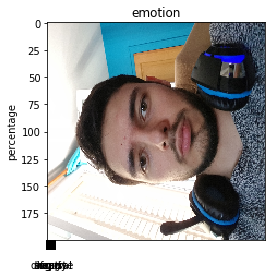

Expression Prediction: sad


In [151]:
from skimage import io
img = image.load_img('Neutralmathias.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('Neutralmathias.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])